# Майнор по Анализу Данных, Группа ИАД-5
## Домашнее задание №3 
## Деревья решений, случайный лес

<hr\>
**Общая информация**

**Срок сдачи:** 07 июня 2017, 23:59 <br\>

При отправлении ДЗ на почту `hse.minor.dm+5@gmail.com` указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [ИАД-5] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>

Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Если вы используете код из общего доступа - просьба сопровождать комментариями и ссылками. В случае совпадения кода и отсутствия ссылок будет выставляться 0 за задание.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Classify leaf with random forest

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Помните [Iris](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)? Данные, с которыми вам предстоит работать в этом задании концептуально похожи на ирисы.

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

## Табличные данные

Загрузите файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [2]:
DATA_DIR = os.path.join('data')
IMG_DIR = os.path.join(DATA_DIR, 'images')

In [3]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [5]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить многомерный numpy массив

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
random_seed = ...

SyntaxError: invalid syntax (<ipython-input-7-7d539db50ee7>, line 1)

In [8]:
# Your Code Here

* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь.

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

In [13]:
# Your Code Here

## Сравнение RF, DT и Bagging'а (2 балла)

На кросс-валидации по обучающей выборке сравните качество и скорость
1. Обычного дерева решений 
2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями


* Изобразите полученные результаты на одном графике
* Используйте `StratifiedKFold` с 4 фолдами для оценки качества
* Мера качества - `accuracy`

In [90]:
# Your Code Here

# Изображения листьев

В папке `images` лежат 1584 изображения различного размера, названные в соответствии с id из файла `table_data.csv`.

In [16]:
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

In [17]:
img.shape

(357, 700)

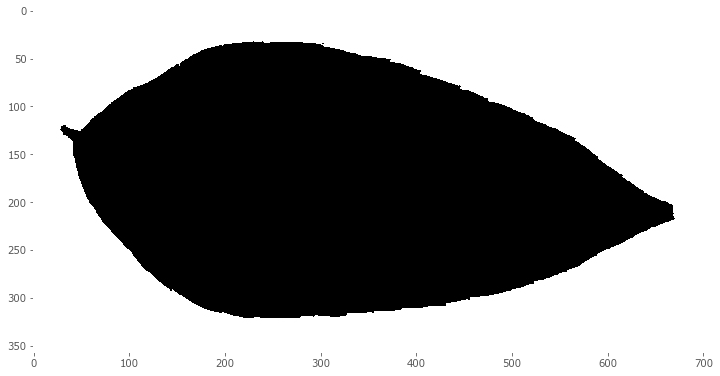

In [18]:
plt.imshow(img, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балла)

Необходимо
1. "Стандартизировать" размер изображений - сделать его одинаковым для всех
2. Отобрать изображения тех листьев, которые представлены в `table_data`

Пункт 1. можно сделать двумя способами:
* C помощью функции scipy.misc.imresize (неидеальный вариант)
* Найти максимальные длинну и ширину полотна и перенести исходные картинки в центр (кажется, что так лучше)

В результате этого задания вы должны получить получить массив изображений IMG_train и IMG_test для обучающей и контрольной выборки.

In [19]:
from scipy.misc import imresize

In [20]:
img_resized = imresize(img, (100, 100))

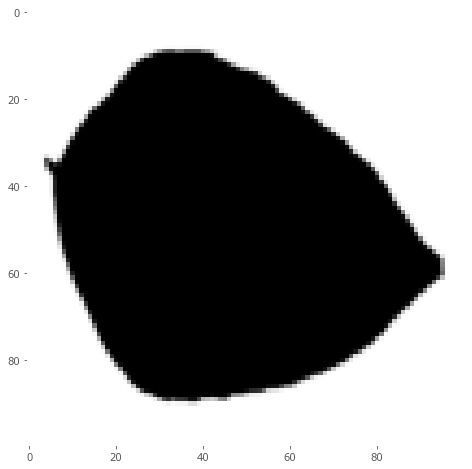

In [21]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

In [22]:
# Your Code Here

## TSNE (2 балла)

* Переформатируйте IMG_train и IMG_test к виду "матрица объект-признак" (команда reshape)
* На данных в X_train и IMG_train (по отдельности) изобразите результат применения T-SNE со следующими настройками: `n_components=2, perplexity=[5,10,20,30,50], method='exact', n_iter=5000, learning_rate=500`. 
* У вас должно получится 10 `scatter-plot` графиков с точками, расскашенными в цвет своего класса (для наглядности в `plt.scatter` укажите `cmap=plt.cm.Paired`)
* В каком случае (X_train или IMG_train) кластеры выделяются лучше? Как вы думаете, почему?


In [ ]:
# Your Code Here

## PCA (1 балл)

* Используйте метод главных компонент, чтобы перейти к пространству меньшей размерности. Подберите количество компонент так, чтобы доля объясненной дисперсии составляла 60%
* Используя результаты МГК на кросс-валидации сравните качество
    1. Обычного дерева решений 
    2. Bagging'a над деревьями решений с 10, 50, 100, 200 и 300 деревьями
    3. Cлучайного леса с 10, 50, 100, 200 и 300 деревьями
    
#### Hint
Составьте [`Pipeline`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) из PCA и предиктивной модели

In [ ]:
# Your Code Here

# Подбор гиперпараметров модели на табличных данных (2 балла)

С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса

* Используйте `StratifiedKFold` на 4х фолдах
* Мера качества - `accuracy`

In [ ]:
# Your Code Here

# Проверка на контрольной выборке (1 балл)

* Примените оптимальную модель на контрольной выборке
* Для нескольких случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса

In [ ]:
# Your Code Here

# Подбор гиперпараметров модели на объединенных данных (2 балла) **

За это задание можно получить 2 дополнительных балла, но сделать его надо безукоризненно =)

Сейчас мы попробуем использовать данные с изображений и табличные данные, которые затем пойдут на вход случайному лесу. Далее надо будет подобрать оптимальные гиперпараметры случайного леса с помощью кросс-валидации

## Объединяем данные

* Составьте матрицу A_train (A_test) как результаты конкатенации матриц X_train и IMG_train (X_test и IMG_test)

In [108]:
# Your Code Here

## Составим  Pipeline

Наш Pipeline условно изображен на рисунке ниже:

<center><img src='scheme.png'></center>


Из объединенных данных в матрице `А` 
1. Выбираются столбцы, которые относятся к изображению и передаются в `PCA`
2. Исходные табличные данные отделяются от всех остальных, но остаются без изменений
3. Результаты пунктов 1 и 2 объединяются
4. И передаются на вход в случайный лес

В результате в переменную model вы должны записать весь Pipeline из шагов 1-4

#### Hints
* Для того, чтобы выбирать столбцы из матрицы `А` можно использовать `FunctionTransformer` (см. пример ниже)
* Для того, чтобы объединять результаты преобразований можно использовать [`FeatureUnion`](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html)

In [109]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

In [110]:
def select_col_idx(X, col_idx=[1]):
    return X[:, col_idx]

In [111]:
trans = FunctionTransformer(select_col_idx, kw_args={'col_idx': [2,3]})

In [112]:
trans.fit_transform(A_train)

array([[ 0.007812,  0.044922],
       [ 0.054688,  0.005859],
       [ 0.039062,  0.046875],
       ..., 
       [ 0.033203,  0.003906],
       [ 0.033203,  0.001953],
       [ 0.03125 ,  0.023438]])

In [141]:
# Your Code Here

## Проверка на контрольной выборке

* Примените оптимальную модель на контрольной выборке
* Сравните качество с моделью на табличных данных

In [ ]:
# Your Code Here